# Ag Analytics-PRISM Precipitation-Demo


Source data obtained from PRISM Climate Group, Oregon State University. API provides accumulated precipitation to date for a given location.



In [ ]:
import requests
import json
import time
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from matplotlib import dates
from matplotlib.dates import DateFormatter
%autosave 0

### API details

####Request URL:
https://ag-analytics.azure-api.net/precipitation/[?month][&day][&year][&coordinateX][&coordinateY][&startYear]

####Parameters:

***month***
***day***
***year - ***
Define the end year of data range.

***coordinateX - ***
X coordinate for location desired.

***coordinateY - ***
Y coordinate for location desired.

***startYear - ***
Define the start year of data range.

In order to get Ocp-Apim-Subscription-Key, please click on this link https://analytics.ag/Session/SignInToAPIPayment

### Request Parameters

In [ ]:
month=1
day=1
year=2016
coordinateX=-88.9893385940128
coordinateY=40.010959177421654
startYear=1981

headers={'Ocp-Apim-Subscription-Key': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'}
           

###  API Function

In [209]:
def get_precipitation(month,day,year,coordinateX,coordinateY,startYear,headers):
    try:
        url = "https://ag-analytics.azure-api.net/precipitation/?month={}&day={}&year={}&coordinateX={}&coordinateY={}&startYear={}".format(month,day,year,coordinateX,coordinateY,startYear)
     
        response = (requests.get(url,headers=headers).text)
        print(response)
        response_json = json.loads(response)
        time.sleep(0.5)
        return response_json
    
    except Exception as e:
        raise e

### Calling API Function and Displaying API Response

In [210]:
prep=get_precipitation(month,day,year,coordinateX,coordinateY,startYear,headers)

[{"CumPrecipitation":[{"Date":"1-1","year":2016,"Accumulated Precipitation":0.0},{"Date":"1-10","year":2016,"Accumulated Precipitation":12.08},{"Date":"1-11","year":2016,"Accumulated Precipitation":12.08},{"Date":"1-12","year":2016,"Accumulated Precipitation":12.08},{"Date":"1-13","year":2016,"Accumulated Precipitation":12.08},{"Date":"1-14","year":2016,"Accumulated Precipitation":12.08},{"Date":"1-15","year":2016,"Accumulated Precipitation":12.08},{"Date":"1-16","year":2016,"Accumulated Precipitation":17.84},{"Date":"1-17","year":2016,"Accumulated Precipitation":18.55},{"Date":"1-18","year":2016,"Accumulated Precipitation":18.55},{"Date":"1-19","year":2016,"Accumulated Precipitation":18.55},{"Date":"1-2","year":2016,"Accumulated Precipitation":0.0},{"Date":"1-20","year":2016,"Accumulated Precipitation":25.73},{"Date":"1-21","year":2016,"Accumulated Precipitation":25.73},{"Date":"1-22","year":2016,"Accumulated Precipitation":25.73},{"Date":"1-23","year":2016,"Accumulated Precipitation"

### Displaying Output

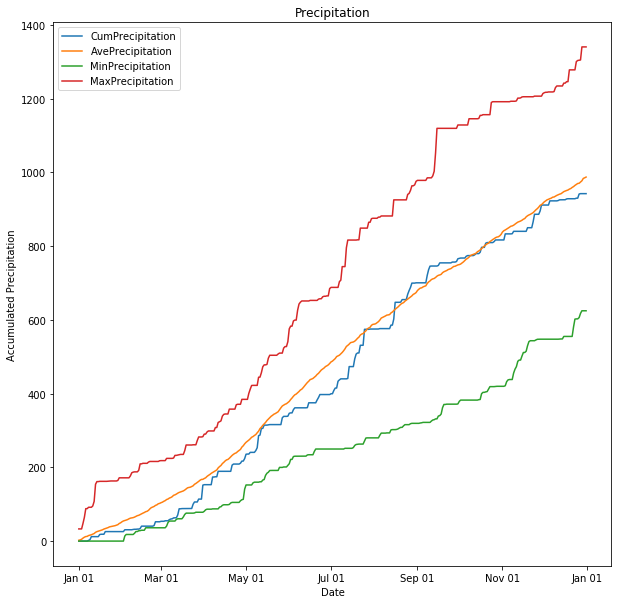

In [214]:

res=pd.DataFrame()

for i,j in enumerate(prep):
    
    for index in prep[i].keys():
            
        
        df = pd.DataFrame.from_records(j[index])
        df.rename(columns={'Accumulated Precipitation':index},inplace=True)
        
        if res.empty:
            res=df
        else:
            res=res.merge(df,on="Date",how="outer")
            
            

# removing feb 29th as the pandas datetime cannot handle just the feb 29th without year

res = res[~(res['Date']=="2-29")]

res['Date']=pd.to_datetime(res['Date'], format = '%m-%d')



dfmt = dates.DateFormatter('%b %d')
res.set_index('Date',inplace=True)


res=res.sort_index()




fig, ax = plt.subplots(figsize=(10,10), linewidth=5)

if 'year' in res.columns:
    res.drop(columns=["year"],inplace=True)
ax.plot(res)
ax.set_xlabel("Date")
ax.set_ylabel("Accumulated Precipitation")
ax.set_title("Precipitation")
ax.legend(res.columns)
ax.xaxis.set_major_formatter(dfmt)
